<a href="https://colab.research.google.com/github/helenksouza/helenksouza/blob/main/api_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar bibliotecas e definir constantes

In [ ]:
### K: Documentação: https://docs.tweepy.org/en/stable/

import tweepy #implementa api do tt
import pandas as pd #lendo dados

pd.set_option('display.width', 1000) #s/ quebrar linhas
pd.set_option('display.max_columns', None)

## Configurar credenciais e instanciar objetos

In [ ]:
consumer_key        = 'a0UFrEDs31mP3QveZ04CSv407'
consumer_secret     = 'flLj85BkLxBWvpLnAzoM4hMChOQ8OIVJeuF2tIk6kEBdk33jUH'
access_token        = '1031714872927690758-YylDk440S0Vs3iIG2HUcvzHqFVhZUL'
access_token_secret = 'l3EDLYG71tao3Q15Nzicyv9iq9TOpwdrccHtkR2haSlVm'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) #identificando quem esta requisitando
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
### K: https://docs.tweepy.org/en/stable/api.html#api-reference

## Obter tweets da forma mais simples

In [ ]:
user_id = 'BarackObama'
tweets = api.user_timeline(screen_name=user_id, 
                           count=10, #qtd de tweets ### K: Max 200.
                           include_rts=False,
                           tweet_mode='extended' #mais de 140 caracteres
                           )

print ('Tweets do {}\n'.format(user_id))
for tweet in tweets[:5]: #1° tweets
     print('ID: {}'.format(tweet.id))
     print(tweet.created_at)
     print(tweet.full_text, '\n')

Tweets do BarackObama

ID: 1459940709088350208
2021-11-14 17:46:04
Young people like @JackHarries and our @ObamaFoundation leaders are using their platforms to pressure the world on climate change. As we move forward with the Glasgow pact, we must listen and follow through on our commitments to protect our planet and secure a better future. https://t.co/rNS08lWEuK 

ID: 1458800452393439239
2021-11-11 14:15:05
This Veterans Day, I want to share Tom Voutsos's story. He served in the U.S. Marine Corps, and has continued to live a life dedicated to public service. Through @LadderUpHousing, he’s helping hardworking folks buy their own home. https://t.co/wgWG9CBMf7 

ID: 1458800450283659272
2021-11-11 14:15:05
To every veteran and their family, we thank you for your service and sacrifice to our country. https://t.co/4EYWe9pRvV 

ID: 1458601125960163332
2021-11-11 01:03:02
.@SpeakerPelosi and these members of Congress are making it clear that the United States is back, and will continue to le

## Obter tweets de múltiplos usuários e escrever em um arquivo

In [ ]:
def retrieve_tweets_from_account(account):
    cursor = tweepy.Cursor(api.user_timeline, id=account,
                           tweet_mode='extended').items(10)
   
    return pd.DataFrame([dict({'created_at':i.created_at, #dicionario
                               'tweet': i.full_text,
                               'author': i.author.screen_name, #nome de tela
                               'retweeted': i.retweeted,
                               'source': i.source,
                               'retweet_count': i.retweet_count,
                               'favorite_count': i.favorite_count,
                               'in_reply_to': i.in_reply_to_screen_name,
                               'coordinates': i.coordinates
                              }) for i in cursor])



account_set = ['OneTweetTony', 
               'TheSeanLock',
               'BarackObama']

df_tweets = pd.DataFrame()
for account in account_set:
    new_tweets = retrieve_tweets_from_account(account)
    df_tweets = df_tweets.append(new_tweets, ignore_index=True)

df_tweets.to_excel('tweets.xlsx')
df_tweets.to_csv('tweets.csv', index=False)

print (df_tweets[:15])

            created_at                                              tweet        author  retweeted                source  retweet_count  favorite_count  in_reply_to coordinates
0  2012-06-13 19:49:44                          Nailed it! That's a wrap!  OneTweetTony      False    Twitter Web Client           2683            2098         None        None
1  2013-12-24 17:26:14  Goodbye Addison and thank you for everything y...   TheSeanLock      False       Twitter Web App             54            1102         None        None
2  2011-12-01 15:29:45  Due to numerous imposters I have been forced t...   TheSeanLock      False    Twitter Web Client           7599           14724         None        None
3  2021-11-14 17:46:04  Young people like @JackHarries and our @ObamaF...   BarackObama      False  Twitter Media Studio           1794           11272         None        None
4  2021-11-11 14:15:05  This Veterans Day, I want to share Tom Voutsos...   BarackObama      False    Twitter for i

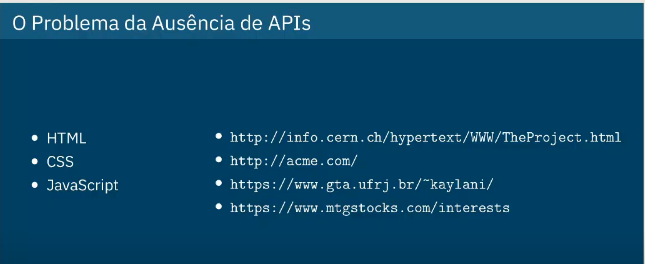